# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

# 載入套件

In [1]:
# 載入 iris example 資料集
from sklearn import datasets #用來匯入資料庫

iris = datasets.load_iris()
X = iris.data
y = iris.target

## 載入相關套件並執行 `hierarchical clustering `實驗 ...

In [2]:
import numpy as np # 產生陣列數值
import matplotlib.pyplot as plt  # 用來繪製影像
from mpl_toolkits.mplot3d import Axes3D # 繪製3D圖形
from sklearn.cluster import AgglomerativeClustering # Hierarchical Clustering 演算法，是用來實現凝聚法聚類模型的。

np.random.seed(5) # 隨機設定種子，可以用在 KMeans 裡 n_init 的參數

%matplotlib inline

'''
%matplotlib inline

是一個魔法函數（Magic Functions），magic函數分兩種：一種是面向行的，另一種是面向單元型的。
行magic函數是用前綴" % "標註的
單元型magic函數是由兩個"%%"做前綴的，它的參數不僅是當前"%%"行後面的內容，也包括了在當前行以下的行。
'''

'\n%matplotlib inline\n\n是一個魔法函數（Magic Functions），magic函數分兩種：一種是面向行的，另一種是面向單元型的。\n行magic函數是用前綴" % "標註的\n單元型magic函數是由兩個"%%"做前綴的，它的參數不僅是當前"%%"行後面的內容，也包括了在當前行以下的行。\n'

**************************************************
# 2.Clustering

## 設定模型的估計參數
### 設定 KMeans 參數，各項參數設定如下:

- n_clusters : 需要計算出的群集數  
- n_init  : 使用不同 centroid seeds 運行 k-means 算法的時間
- init  : 設定初始化方式

###### 參考來源:https://machine-learning-python.kspax.io/clustering/ex10_k-means_clustering

In [3]:
estimators = [('hc_ward', AgglomerativeClustering(n_clusters=3, linkage="ward")),
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage="complete")),
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage="average"))]

'''
linkage：鏈接標準，即樣本點的合併標準，
主要有ward、complete、average三個參數可選，默認是ward。
每個簇（類）本身就是一個集合，我們在合併兩個簇的時候其實是在合併兩個集合，
所以我們需要找到一種計算兩個集合之間距離的方式，
主要有這三種方式：ward、complete、average，
分別表示使用兩個集合方差、兩個集合中點與點距離之間的平均值、兩個集合中距離最小的兩個點的距離。

參考來源:https://www.itcodemonkey.com/article/5570.html
'''

'\nlinkage：鏈接標準，即樣本點的合併標準，\n主要有ward、complete、average三個參數可選，默認是ward。\n每個簇（類）本身就是一個集合，我們在合併兩個簇的時候其實是在合併兩個集合，\n所以我們需要找到一種計算兩個集合之間距離的方式，\n主要有這三種方式：ward、complete、average，\n分別表示使用兩個集合方差、兩個集合中點與點距離之間的平均值、兩個集合中距離最小的兩個點的距離。\n\n參考來源:https://www.itcodemonkey.com/article/5570.html\n'

***
# [資料建模並視覺化結果]

Axes3D(est.fit, ax.scatter, ax.dist)

## [參數說明]:
- Axes3D : 定義一個3D的圖形 。
-est.fit : 根據上面`estimators`去 fit 資料庫的圖 。
- ax.scatter : 畫散點圖，後面的參數用來調整顏色 。
- ax.dist : 設定與物體之間的距離。

## [matplotlib各個對象及子對象的理解]
### 參數說明

- 1. Axes3D（）：3D axes object.
- 2. matplotlib.axes.Axes(fig,rect)：2Daxes object。

The Axes contains most of the figure elements: Axis, Tick, Line2D, Text, Polygon, etc., and sets the coordinate system.
建立一個座標軸實例在圖figure中，其中rect參數用來確定在圖中的位置。左邊座標，底部座標，寬度，高度。例：rect=[0.15,0.1,0.7,0.5]。

###### 參考來源:https://www.twblogs.net/a/5c26961abd9eee16b4a81cce

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


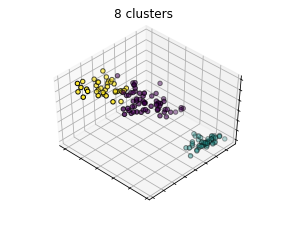

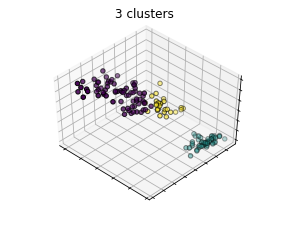

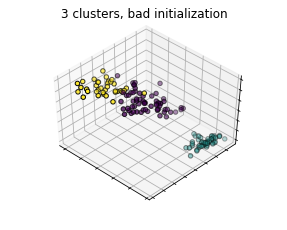

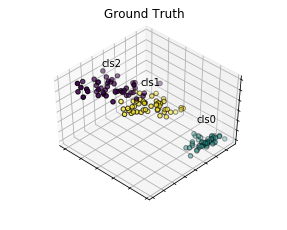

In [4]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134) #rect 作為定義圖表的[left, bottom, width, height]、 elev為俯視角、azim為側視角
    
    # fit建立模型
    est.fit(X) # 根據上面 estimators 去 fit 資料庫的圖 
    
    labels = est.labels_ #輸出原始數據資料的聚類後的標籤值

    #繪製X中的第3，0，2個維度的特徵
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')  # edgecolor圓圈邊邊顏色
    
    # 設定座標軸名稱
    ax.w_xaxis.set_ticklabels([]) # 設定x軸標籤名稱
    ax.w_yaxis.set_ticklabels([]) # 設定y軸標籤名稱
    ax.w_zaxis.set_ticklabels([]) # 設定z軸標籤名稱
    # 設定圖的名稱
    ax.set_title(titles[fignum - 1]) # 設置title
    
    # ax.dist沒有任何單位，它是預測的相關因素，預設值爲ax.dist = 10，較小的值使單位立方體看起來更接近，而更大的值使其看起來更遠。
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth(繪製數據的真實標籤(label))
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134) # 創建3D圖像、rect 作為定義圖表的[left, bottom, width, height]、 elev為俯視角、azim為側視角

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    # 尋找特徵的均值點
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w')) # edgecolor圓圈邊邊顏色
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k') # edgecolor圓圈邊邊顏色

# 設定座標軸名稱
ax.w_xaxis.set_ticklabels([]) # 設定x軸標籤名稱
ax.w_yaxis.set_ticklabels([]) # 設定y軸標籤名稱
ax.w_zaxis.set_ticklabels([]) # 設定z軸標籤名稱
# 設定圖的名稱
ax.set_title('Ground Truth') # 設置title

# ax.dist沒有任何單位，它是預測的相關因素，預設值爲ax.dist = 10，較小的值使單位立方體看起來更接近，而更大的值使其看起來更遠。
ax.dist = 12

# 繪製整張圖
fig.show()